In [8]:
import pandas as pd
import matplotlib
import sys
sys.path.insert(1, sys.path[0].replace('tests', 'src'))
from polynomial_regression import PolynomialRegression
data = [(1, 3), (2, 10), (3, 40), (4, 25), (5, 90), (6, 100), (7, 180), (8, 140), (9, 250), (10, 260)]


In [9]:
linear = PolynomialRegression()
linear.fit([[1, 3], [2, 10], [3, 40], [4, 25], [5, 90], [6, 100], [7, 180], [8, 140], [9, 250], [10, 260]], 1)
quad = PolynomialRegression()
quad.fit([[1, 3], [2, 10], [3, 40], [4, 25], [5, 90], [6, 100], [7, 180], [8, 140], [9, 250], [10, 260]], 2)
sevendeg = PolynomialRegression()
sevendeg.fit([[1, 3], [2, 10], [3, 40], [4, 25], [5, 90], [6, 100], [7, 180], [8, 140], [9, 250], [10, 260]], 7)




In [10]:
x = range(0, 201)
x = [x_val / 10 for x_val in x]
linear_regression_points = [linear.predict(x_val) for x_val in x]
quadratic_regression_points = [quad.predict(x_val) for x_val in x]
seventh_regression_points = [sevendeg.predict(x_val) for x_val in x]

30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.10909090909091
30.1090909

(-20.0, 300.0)

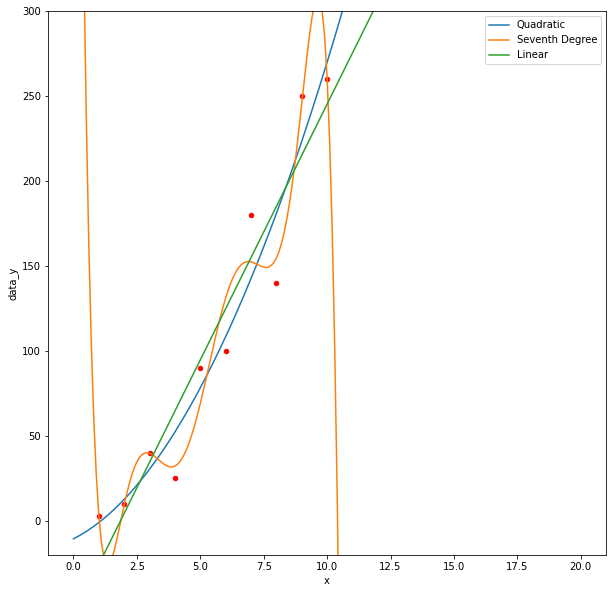

In [12]:
data_y = [point[1] for point in data]
data_x = [point[0] for point in data]
original_df = pd.DataFrame({'data_y': data_y, 'data_x': data_x})
original_points = original_df.plot(x='data_x', y='data_y', kind='scatter', figsize=(10, 10), color='red')
points = pd.DataFrame(
    {'x': x, '1': linear_regression_points, '2': quadratic_regression_points, '7': seventh_regression_points})
quadratic_plot = points.plot(x='x', y='2', ax=original_points, label='Quadratic')
seventh_deg_plot = points.plot(x='x', y='7', ax=quadratic_plot, label='Seventh Degree')
points.plot(x='x', y='1', ax=seventh_deg_plot, label='Linear').set_ylim(-20, 300)

30.10909090909091
7.484090909090355
7.484090909090355
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
30.10909090909091
7.484090909090355
7.484090909090355
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
30.10909090909091
7.484090909090355
7.484090909090355
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
30.10909090909091
7.484090909090355
7.484090909090355
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
30.10909090909091
7.484090909090355
7.484090909090355
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
-2310.187445819378
30.10909090909091
7.484090909090355
7.484090909090355
-2310.18744

<AxesSubplot:>

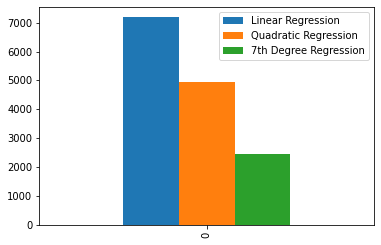

In [14]:
rss_dict = {'Linear Regression': 0, 'Quadratic Regression': 0, '7th Degree Regression': 0}
for point in data:
    rss_dict['Linear Regression'] += (point[1] - linear.predict(point[0])) ** 2
    rss_dict['Quadratic Regression'] += (point[1] - quad.predict(point[0])) ** 2
    rss_dict['7th Degree Regression'] += (point[1] - sevendeg.predict(point[0])) ** 2
print(rss_dict)
a = pd.DataFrame(rss_dict, index=[0])
a.plot(kind="bar")

In [19]:
rss_dict = {'Linear Regression': 0,
            'Quadratic Regression': 0, '7th Degree Regression': 0}
for i in range(len(data)):
    current_point = data[i]
    data.pop(i)
    regressor = PolynomialRegression()
    regressor.fit(data, 1)
    rss_dict['Linear Regression'] += (current_point[1] - regressor.predict(current_point[0])) ** 2

    regressor.fit(data, 2)
    rss_dict['Quadratic Regression'] += (current_point[1] - regressor.predict(current_point[0]))** 2

    regressor.fit(data, 7)
    rss_dict['7th Degree Regression'] += (current_point[1] -regressor.predict(current_point[0])) ** 2
    data.insert(i, current_point)
print(rss_dict)

34.464285714285694
12.410714285712857
12.410714285712857
-212840.02951049805
-212840.02951049805
-212840.02951049805
-212840.02951049805
-212840.02951049805
-212840.02951049805
-212840.02951049805
33.571428571428555
12.946428571429351
12.946428571429351
-121626.60037231445
-121626.60037231445
-121626.60037231445
-121626.60037231445
-121626.60037231445
-121626.60037231445
-121626.60037231445
31.216216216216196
13.049837486456909
13.049837486456909
-65615.85271453857
-65615.85271453857
-65615.85271453857
-65615.85271453857
-65615.85271453857
-65615.85271453857
-65615.85271453857
32.51592356687897
7.721956031566151
7.721956031566151
-28679.814044952393
-28679.814044952393
-28679.814044952393
-28679.814044952393
-28679.814044952393
-28679.814044952393
-28679.814044952393
32.5
14.011627906977083
14.011627906977083
-2667.601978302002
-2667.601978302002
-2667.601978302002
-2667.601978302002
-2667.601978302002
-2667.601978302002
-2667.601978302002
32.006369426751576
-0.49112175873733577
-0.491

<AxesSubplot:>

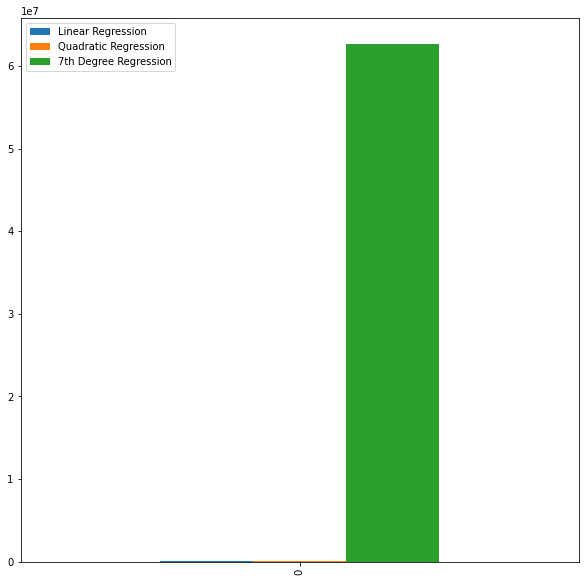

In [18]:
valid_df = pd.DataFrame(rss_dict, index=[0])
valid_df.plot(kind='bar', figsize=(10, 10))